Tham khảo: https://thorpham.github.io/blog/2018/04/06/Nh%E1%BA%ADn-d%E1%BA%A1ng-ch%E1%BB%AF-s%E1%BB%91-vi%E1%BA%BFt-tay-v%E1%BB%9Bi-sklearn-v%C3%A0-opencv/

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.svm import LinearSVC
from keras.datasets import mnist
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
X_train_feature = []
for i in range(len(X_train)):
    feature = hog(X_train[i],orientations=9,pixels_per_cell=(14,14),cells_per_block=(1,1),block_norm="L2")
    X_train_feature.append(feature)
X_train_feature = np.array(X_train_feature,dtype = np.float32)

In [0]:

X_test_feature = []
for i in range(len(X_test)):
    feature = hog(X_test[i],orientations=9,pixels_per_cell=(14,14),cells_per_block=(1,1),block_norm="L2")
    X_test_feature.append(feature)
X_test_feature = np.array(X_test_feature,dtype=np.float32)

In [0]:
model = LinearSVC(C=10)

In [7]:
model.fit(X_train_feature,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [0]:
y_pre = model.predict(X_test_feature)

In [9]:
print(accuracy_score(y_test,y_pre))

0.899


In [0]:
image = cv2.imread("/content/gdrive/My Drive/app/handwritendigit/digit.jpg")
im_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
im_blur = cv2.GaussianBlur(im_gray,(5,5),0)
im,thre = cv2.threshold(im_blur,90,255,cv2.THRESH_BINARY_INV)
_,contours,hierachy = cv2.findContours(thre,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(cnt) for cnt in contours]

Gải thích code một tí hem:
  
Đầu tiên convert color sang gray color
Tiếp theo giảm nhiễu bằng Gaussian( tùy thuộc image mà ta xử lý khác nhau)
Tiếp theo dùng threshold chuyển về ảnh binary
Cuối cùng là tìm contour và vẽ bouding box
Sau đó predict ditgit của mỗi box.

In [0]:
for i in contours:
    (x,y,w,h) = cv2.boundingRect(i)
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3)
    roi = thre[y:y+h,x:x+w]
    roi = np.pad(roi,(20,20),'constant',constant_values=(0,0))
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    roi = cv2.dilate(roi, (3, 3))
    
    # Calculate the HOG features
    roi_hog_fd = hog(roi, orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1),block_norm="L2")
    nbr = model.predict(np.array([roi_hog_fd], np.float32))
    cv2.putText(image, str(int(nbr[0])), (x, y),cv2.FONT_HERSHEY_DUPLEX, 2, (0, 255, 255), 3)
    #cv2.imshow("image",image)
cv2.imwrite("/content/gdrive/My Drive/app/handwritendigit/image_pand.jpg",image)
cv2.waitKey()
cv2.destroyAllWindows()

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

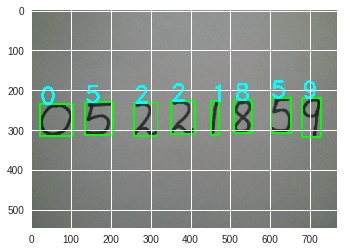

In [15]:
plt.imshow(image,cmap="gray")